In [1]:
# 神经网络基础与移动推荐系统

In [2]:
## Activation Function

In [3]:
### Relu

In [1]:
import numpy as np
import matplotlib.pyplot as plt

4


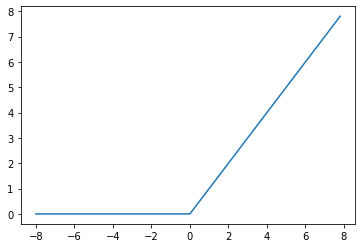

In [2]:
# 绘制relu图
def plot_relu():
    # 设置参数x（起点，终点，间距）
    x = np.arange(-8, 8, 0.2)
    y = relu(x)
    plt.plot(x, y)
    plt.show()

# relu函数
def relu(x):
    y = np.where(x<0,0,x)
    return y

print(relu(4))
plot_relu()


In [3]:
### Sigmod

In [4]:
import numpy as np
import matplotlib.pyplot as plt

0.9820137900379085


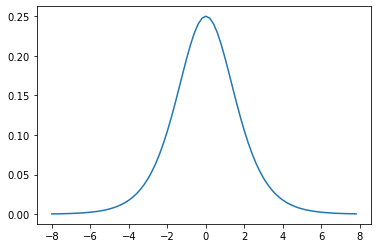

In [5]:
# 绘制sigmoid图
def plot_sigmoid():
    # 设置参数x（起点，终点，间距）
    x = np.arange(-8, 8, 0.2)
    y = sigmoid(x)
    plt.plot(x, y)
    plt.show()

# 绘制sigmoid函数的导数
def plot_ds():
    # 设置参数x（起点，终点，间距）
    x = np.arange(-8, 8, 0.2)
    y = derivative_sigmoid(x)
    plt.plot(x, y)
    plt.show()


# sigmoid函数
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

# sigmoid函数导数
def derivative_sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    ds = s*(1-s)
    return ds

print(sigmoid(4))
#plot_sigmoid()
plot_ds()

In [6]:
### Tanh

In [7]:
import numpy as np
import matplotlib.pyplot as plt


0.9993292997390669


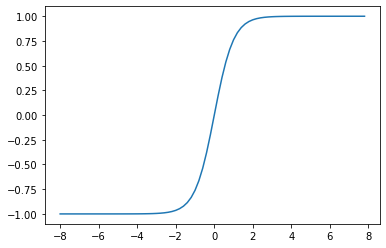

In [8]:
# 绘制tanh图
def plot_tanh():
    # 设置参数x（起点，终点，间距）
    x = np.arange(-8, 8, 0.2)
    y = tanh(x)
    plt.plot(x, y)
    plt.show()

# tanh函数
def tanh(x):
    y=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return y

print(tanh(4))
plot_tanh()


In [9]:
## Python Base

In [10]:
from collections import defaultdict
dict1 = defaultdict(int)
dict2 = defaultdict(set)
dict3 = defaultdict(str)
dict4 = defaultdict(list)
print(dict1[1])
print(dict2[1])
print(dict3[1])
print(dict4[1])

0
set()

[]


In [11]:
import time

timestamp = time.time()
print("当前时间戳为:", timestamp)
localtime = time.localtime(timestamp)
print("本地时间为 :", localtime)

from datetime import datetime
str1 = '2020-04-10'
result = datetime.strptime(str1, '%Y-%m-%d')
print(result)
result = datetime.strptime(str1, '%Y-%d-%m')
print(result)

from datetime import timedelta
# 从2014-11-18遍历到2014-12-18
str1 = '2014-11-18'
temp_date = datetime.strptime(str1, '%Y-%m-%d')
delta = timedelta(days=1)
for i in range(30):
	temp_date  = temp_date + delta
	print(temp_date)

当前时间戳为: 1630859815.4292102
本地时间为 : time.struct_time(tm_year=2021, tm_mon=9, tm_mday=6, tm_hour=0, tm_min=36, tm_sec=55, tm_wday=0, tm_yday=249, tm_isdst=0)
2020-04-10 00:00:00
2020-10-04 00:00:00
2014-11-19 00:00:00
2014-11-20 00:00:00
2014-11-21 00:00:00
2014-11-22 00:00:00
2014-11-23 00:00:00
2014-11-24 00:00:00
2014-11-25 00:00:00
2014-11-26 00:00:00
2014-11-27 00:00:00
2014-11-28 00:00:00
2014-11-29 00:00:00
2014-11-30 00:00:00
2014-12-01 00:00:00
2014-12-02 00:00:00
2014-12-03 00:00:00
2014-12-04 00:00:00
2014-12-05 00:00:00
2014-12-06 00:00:00
2014-12-07 00:00:00
2014-12-08 00:00:00
2014-12-09 00:00:00
2014-12-10 00:00:00
2014-12-11 00:00:00
2014-12-12 00:00:00
2014-12-13 00:00:00
2014-12-14 00:00:00
2014-12-15 00:00:00
2014-12-16 00:00:00
2014-12-17 00:00:00
2014-12-18 00:00:00


In [12]:
## 使用numpy实现Boston房价预测

In [13]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample

In [14]:
# 数据加载
data = load_boston()
X_ = data['data']
y = data['target']
#print(X_)
#print(len(X_)) # 506
y = y.reshape(y.shape[0],1)

In [15]:
# 数据规范化
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)
#print(X_)

np.random.seed(33)

n_features = X_.shape[1]
n_hidden = 16
w1 = np.random.randn(n_features, n_hidden)
b1 = np.zeros(n_hidden)
w2 = np.random.randn(n_hidden, 1)
b2 = np.zeros(1)

In [16]:
# relu函数
def Relu(x):
    result = np.where(x<0,0,x)
    return result

# 设置学习率
learning_rate = 1e-5

def MSE_loss(y, y_hat):
    return np.mean(np.square(y_hat - y))

def Linear(X, W1, b1):
    result = X.dot(W1) + b1
    return result

In [17]:
# 5000次迭代
for t in range(5000):
    # 前向传播，计算预测值y
    l1 = Linear(X_, w1, b1)
    s1 = Relu(l1)
    #s1 = np.maximum(l1, 0)
    #print('s1=', s1.shape) #(506, 10)
    #print('w2=', w2.shape) #(506, 10)
    #print('s1.T=', s1.T.shape) #(10, 506)
    y_pred = Linear(s1, w2, b2)
    #y_pred = l2 = s1.dot(w2) + b2
    #print('y_pred=', y_pred.shape) #(506, 1)
    #print('y=', y.shape) #(506, 1)


    #temp = X.dot(w1)
    #temp_relu = np.maximum(temp, 0)
    #y_pred = temp_relu.dot(w2)

    # 计算损失函数
    loss = MSE_loss(y, y_pred)
    #print(y_pred)
    #print(y_pred.shape)
    print(t, loss)

    # 反向传播，基于loss 计算w1和w2的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = s1.T.dot(grad_y_pred) #(10, 506) * (506, 506)
    #print('grad_w2=', grad_w2.shape) #(10, 506)
    #print('grad_y_pred=', grad_y_pred.shape) #(506, 506)
    #print('w2.T=', w2.T.shape) #(1, 10)
    grad_temp_relu = grad_y_pred.dot(w2.T) #(506, 506),  (1, 10)
    #grad_temp = grad_temp_relu.copy()
    grad_temp_relu[l1<0] = 0
    grad_w1 = X_.T.dot(grad_temp_relu)

    # 更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 297.03368368729946
1 169.29531836804014
2 104.58561106663221
3 75.38551670789849
4 63.14902797890418
5 57.3627041743113
6 53.79808160928698
7 51.16171091374707
8 49.04162760502335
9 47.25436617515906
10 45.70547277660736
11 44.352850477796785
12 43.13524036841349
13 42.024120089059174
14 41.00737534203943
15 40.070826876597444
16 39.1992778964584
17 38.38737395570335
18 37.629061246496114
19 36.923692444861956
20 36.25320011011349
21 35.61765752123139
22 35.01617079653234
23 34.44986709262706
24 33.90448090118872
25 33.38550968677576
26 32.88881919920236
27 32.41323276065982
28 31.950963758662017
29 31.49898542765378
30 31.064567035597793
31 30.644399639065128
32 30.239182258216726
33 29.842577527366533
34 29.46011953423292
35 29.089948421563513
36 28.73356191517718
37 28.377706653219036
38 28.02778153712415
39 27.68886135703589
40 27.361198431350175
41 27.041314929735204
42 26.729826932200307
43 26.42970971813895
44 26.141767473762314
45 25.863223219992175
46 25.594511700701467
47 2

In [18]:
print('w1={} \n w2={}'.format(w1, w2))
#print(w1) 
#print(w2) 

w1=[[-0.2701683  -2.02951253 -0.8304169  -0.90077378 -0.02893726  0.7549682
  -0.10305316  1.96826694 -1.87530719  0.05939145 -0.08642927 -2.0108245
  -0.12705275  0.85371797 -2.11605642 -2.90352461]
 [ 0.26274109  1.24129863 -0.61541938  0.6869544   1.73407009  0.04102063
  -2.68277333  0.31985303 -0.22839999 -0.2661885  -0.69289612  0.11433222
   0.6049057  -0.38868284 -0.96561559 -0.92274061]
 [ 1.1011202  -0.35702859 -0.907765    0.16912184 -0.08446668 -0.49647932
  -0.72517421  0.32482881 -0.11214861  1.30158805  0.49322027  0.1166813
  -0.51713885 -0.05657106 -0.35123233 -0.65575844]
 [-0.33532401  1.2093962  -0.49307874 -3.34636183 -0.24943269 -0.04378605
  -0.7348978   0.74513882 -0.05591655  0.23996437  2.0049785  -0.29196963
   0.49864038 -1.05948409  0.02770262 -3.93077973]
 [-0.95340137  0.39985635  0.74636698 -0.11918588 -1.42961794  0.33882329
   0.62569778 -1.92152102 -0.49752027  0.55198441 -1.3293285  -0.28202588
  -2.12686058  0.0953385   0.19771252  1.95287642]
 [ 1.

In [19]:
## 使用numpy实现一个神经网络

In [20]:
import numpy as np

In [21]:
# n为样本大小，d_in为输入维度,d_out为输出维度,h为隐藏层维度
n, d_in, h, d_out = 64, 1000, 100, 10

In [22]:
# 随机生成数据
x = np.random.randn(n, d_in)
y = np.random.randn(n, d_out)

In [23]:
# 随机初始化权重
# 输入层到隐藏层的权重（1000，100）
w1 = np.random.randn(d_in, h)
# 隐藏层到输出层的权重（100，10）
w2 = np.random.randn(h, d_out)
# 设置学习率
learning_rate = 1e-6

In [24]:
# 500次迭代
for t in range(500):
    # 前向传播，计算预测值y
    temp = x.dot(w1)
    temp_relu = np.maximum(temp, 0)
    y_pred = temp_relu.dot(w2)

    # 计算损失函数
    loss = np.square(y_pred - y).sum()
    #print(t, loss)

    # 反向传播，基于loss 计算w1和w2的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    print('grad_y_pred=', grad_y_pred.shape) #(64, 10)
    grad_w2 = temp_relu.T.dot(grad_y_pred)
    grad_temp_relu = grad_y_pred.dot(w2.T)
    grad_temp = grad_temp_relu.copy()
    grad_temp_relu[temp<0] = 0
    grad_w1 = x.T.dot(grad_temp)

    # 更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
#print(w1, w2)
#print(w1) 
#print(w2) 

grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pred= (64, 10)
grad_y_pre